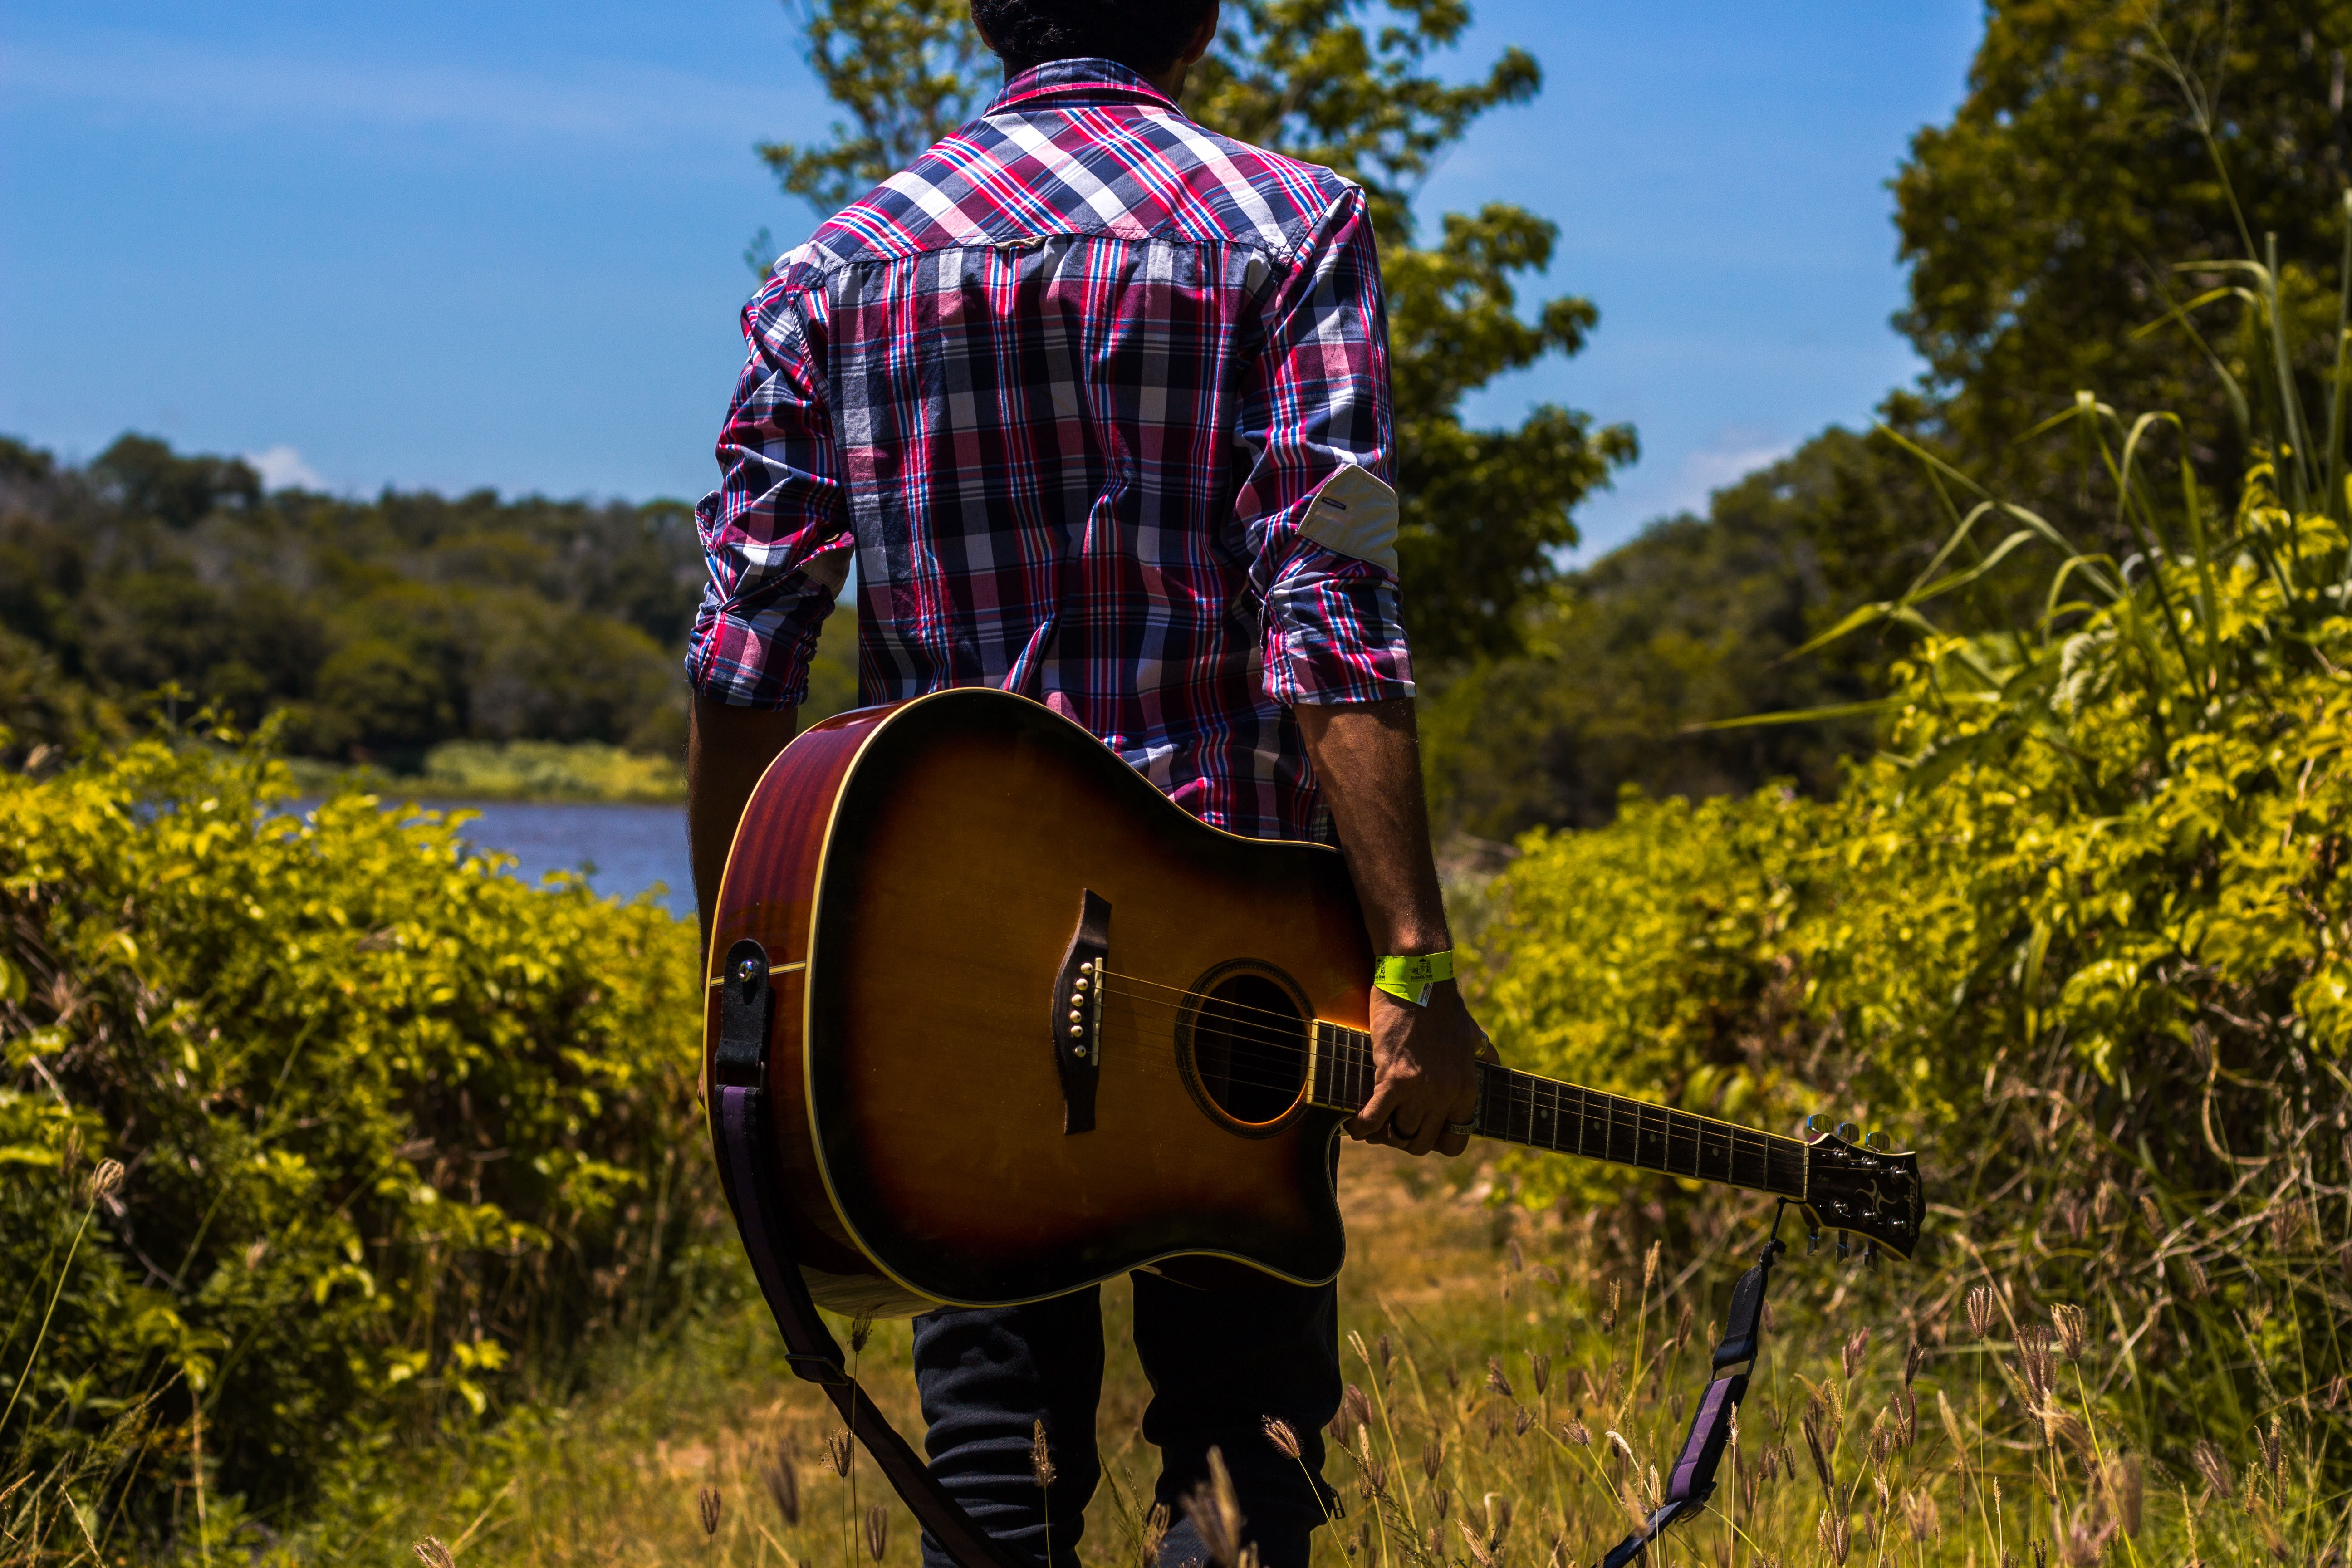

In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Extracting Feature vector and Target vector

In [2]:
import pandas as pd
data=pd.read_csv('music.csv')
data.head()

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mel_specgram_mean125,mel_specgram_var125,mel_specgram_mean126,mel_specgram_var126,mel_specgram_mean127,mel_specgram_var127,mel_specgram_mean128,mel_specgram_var128,tempo,label
0,final_blues00.wav,0.335434,0.091088,0.130405,0.003521,1773.285877,168244.728448,1972.723622,117298.851326,3714.477539,...,5.875805,121.360504,5.875805,121.360504,5.875805,121.360504,5.875805,121.360504,129.199219,final_blues
1,final_blues01.wav,0.343020,0.086142,0.112699,0.001450,1816.195860,90703.325185,2009.201575,65548.531475,3868.771221,...,6.676786,97.969818,6.676786,97.969818,6.676786,97.969818,6.676786,97.969818,123.046875,final_blues
2,final_blues02.wav,0.346838,0.092210,0.132002,0.004620,1788.642783,111322.537051,2085.045996,74755.260660,3995.568660,...,6.897610,69.025826,6.897610,69.025826,6.897610,69.025826,6.897610,69.025826,123.046875,final_blues
3,final_blues03.wav,0.363671,0.086856,0.132562,0.002447,1654.902168,112316.264385,1959.202709,83672.222326,3566.395358,...,5.599164,74.678688,5.599164,74.678688,5.599164,74.678688,5.599164,74.678688,123.046875,final_blues
4,final_blues04.wav,0.335927,0.088291,0.143289,0.001701,1630.737017,79648.228297,1948.459295,60221.595017,3469.910044,...,7.565843,126.943962,7.565843,126.943962,7.565843,126.943962,7.565843,126.943962,123.046875,final_blues


In [3]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
data.head()


,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mel_specgram_mean125,mel_specgram_var125,mel_specgram_mean126,mel_specgram_var126,mel_specgram_mean127,mel_specgram_var127,mel_specgram_mean128,mel_specgram_var128,tempo,label
0,0.335434,0.091088,0.130405,0.003521,1773.285877,168244.728448,1972.723622,117298.851326,3714.477539,1.080245e+06,...,5.875805,121.360504,5.875805,121.360504,5.875805,121.360504,5.875805,121.360504,129.199219,final_blues
1,0.343020,0.086142,0.112699,0.001450,1816.195860,90703.325185,2009.201575,65548.531475,3868.771221,6.718196e+05,...,6.676786,97.969818,6.676786,97.969818,6.676786,97.969818,6.676786,97.969818,123.046875,final_blues
2,0.346838,0.092210,0.132002,0.004620,1788.642783,111322.537051,2085.045996,74755.260660,3995.568660,7.958481e+05,...,6.897610,69.025826,6.897610,69.025826,6.897610,69.025826,6.897610,69.025826,123.046875,final_blues
3,0.363671,0.086856,0.132562,0.002447,1654.902168,112316.264385,1959.202709,83672.222326,3566.395358,9.266212e+05,...,5.599164,74.678688,5.599164,74.678688,5.599164,74.678688,5.599164,74.678688,123.046875,final_blues
4,0.335927,0.088291,0.143289,0.001701,1630.737017,79648.228297,1948.459295,60221.595017,3469.910044,6.102642e+05,...,7.565843,126.943962,7.565843,126.943962,7.565843,126.943962,7.565843,126.943962,123.046875,final_blues


In [4]:
data.isnull().sum().sum()

0

In [5]:
#Target column
target=data['label']

In [6]:
#Feature vector
feature=data.drop(columns='label',axis=1)

In [7]:
#One hot  encoding the target variable
target=pd.get_dummies(target)
target.head()

,final_blues,final_classical,final_country,final_disco,final_hiphop,final_jazz,final_metal,final_pop,final_reggae,final_rock
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [8]:
def split_transform_data(X,Y,test_size,random_state):
    from sklearn.model_selection import train_test_split
    X_train,X_test,Y_train,Y_test=train_test_split(feature,target,test_size=test_size,random_state=random_state)
    print("The number of training examples is :{}\n".format(X_train.shape[0]))
    print("The number of testing  examples is :{}".format(X_test.shape[0]))
    from sklearn.preprocessing import StandardScaler
    sc=StandardScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    usable_data={
        "training_data_feature":X_train,
        "training_data_target":Y_train,
        "testing_data_feature":X_test,
        "testing_data_target":Y_test
    }
    return usable_data
    

In [9]:
usable_data=split_transform_data(feature,target,0.1,42)

The number of training examples is :9000

The number of testing  examples is :1000


In [10]:
#Training data
X_train=usable_data['training_data_feature']
Y_train=usable_data['training_data_target']
X_test=usable_data['testing_data_feature']
Y_test=usable_data['testing_data_target']

In [36]:
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [15]:
import tensorflow as tf


In [45]:
# Create sequential model 
cnn_model = tf.keras.models.Sequential()
#First CNN layer  with 32 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=256, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)))
cnn_model.add(Conv1D(filters=256, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)))
cnn_model.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)))
#Second CNN layer  with 64 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Third CNN layer with 128 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn_model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Fourth CNN layer with Max pooling
cnn_model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
cnn_model.add(Dropout(0.5))
#Flatten the output
cnn_model.add(Flatten())
#Add a dense layer with 256 neurons
cnn_model.add(Dense(units = 256, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Add a dense layer with 512 neurons
cnn_model.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Softmax as last layer with five outputs
cnn_model.add(Dense(units = 10, activation='softmax'))

In [23]:
#Reshape train and test data to (n_samples, 187, 1), where each sample is of size (187, 1)
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [46]:
cnn_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [47]:
cnn_model_history = cnn_model.fit(X_train, Y_train, epochs=100, batch_size = 20, validation_split=0.1)

Epoch 1/100
405/405 [==============================] - 69s 169ms/step - loss: 1.2871 - accuracy: 0.5378 - val_loss: 0.8858 - val_accuracy: 0.6900
Epoch 2/100
405/405 [==============================] - 63s 156ms/step - loss: 0.7990 - accuracy: 0.7278 - val_loss: 0.5994 - val_accuracy: 0.7967
Epoch 3/100
405/405 [==============================] - 65s 160ms/step - loss: 0.6293 - accuracy: 0.7811 - val_loss: 0.5614 - val_accuracy: 0.8100
Epoch 4/100
405/405 [==============================] - 60s 149ms/step - loss: 0.4978 - accuracy: 0.8259 - val_loss: 0.5383 - val_accuracy: 0.8067
Epoch 5/100
405/405 [==============================] - 60s 149ms/step - loss: 0.4279 - accuracy: 0.8535 - val_loss: 0.4929 - val_accuracy: 0.8389
Epoch 6/100
405/405 [==============================] - 58s 144ms/step - loss: 0.3535 - accuracy: 0.8767 - val_loss: 0.4681 - val_accuracy: 0.8522
Epoch 7/100
405/405 [==============================] - 56s 139ms/step - loss: 0.3074 - accuracy: 0.8912 - val_loss: 0.4159 -

Epoch 57/100
405/405 [==============================] - 91s 226ms/step - loss: 0.0364 - accuracy: 0.9877 - val_loss: 0.5079 - val_accuracy: 0.9178
Epoch 58/100
405/405 [==============================] - 86s 213ms/step - loss: 0.0583 - accuracy: 0.9823 - val_loss: 0.3906 - val_accuracy: 0.9256
Epoch 59/100
405/405 [==============================] - 78s 193ms/step - loss: 0.0615 - accuracy: 0.9812 - val_loss: 0.3580 - val_accuracy: 0.9178
Epoch 60/100
405/405 [==============================] - 66s 162ms/step - loss: 0.0445 - accuracy: 0.9854 - val_loss: 0.3739 - val_accuracy: 0.9278
Epoch 61/100
405/405 [==============================] - 65s 160ms/step - loss: 0.0509 - accuracy: 0.9859 - val_loss: 0.5132 - val_accuracy: 0.9144
Epoch 62/100
405/405 [==============================] - 69s 170ms/step - loss: 0.0877 - accuracy: 0.9769 - val_loss: 0.3765 - val_accuracy: 0.9211
Epoch 63/100
405/405 [==============================] - 78s 193ms/step - loss: 0.0474 - accuracy: 0.9854 - val_loss: 0

In [41]:
cnn_model.evaluate(X_test,Y_test)

32/32 [==============================] - 0s 9ms/step - loss: 0.3609 - accuracy: 0.8960


[0.36091485619544983, 0.8960000276565552]

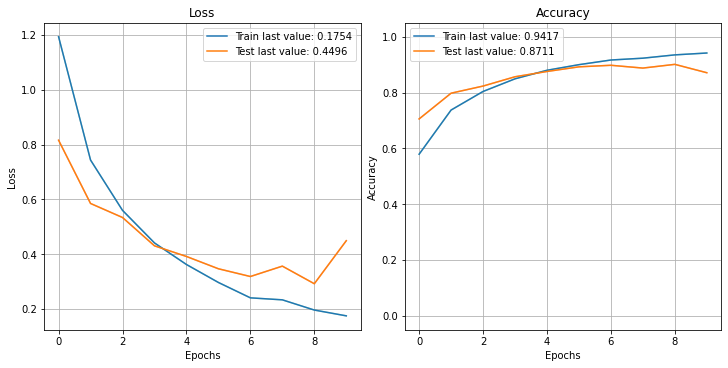

In [44]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt
show_history(cnn_model_history)
#plot_history(histo['training_history'], path="standard_model.png")
plt.close()

# Thus, the accuracy of 1-D CNN model on test dataset is 89.60%

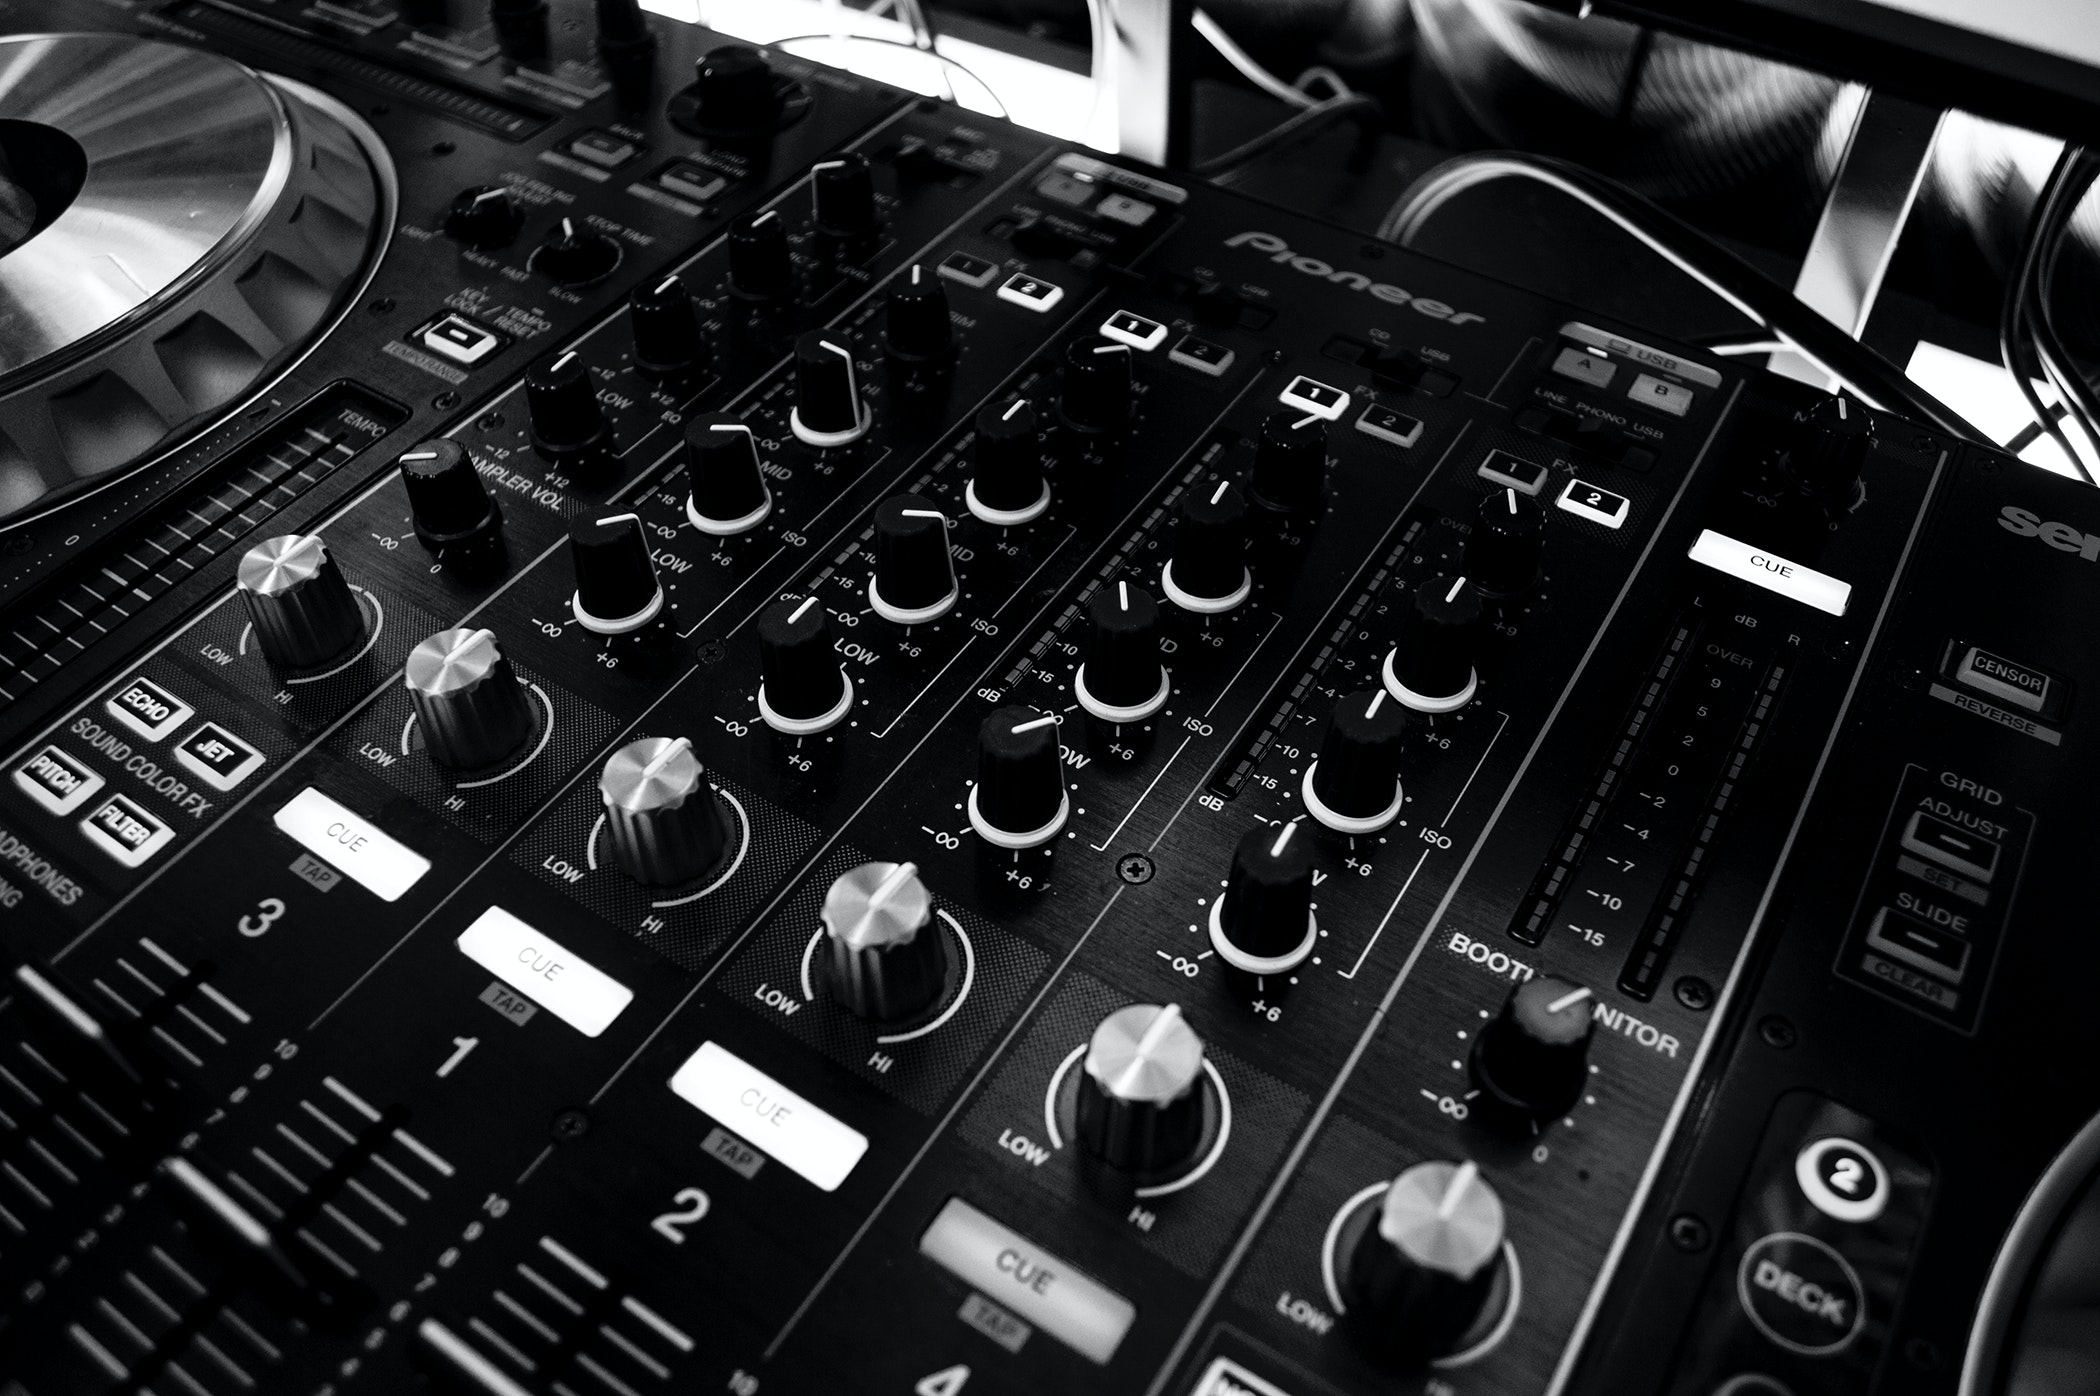